<a href="https://colab.research.google.com/github/kenrp8/Ejemplo/blob/main/Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo
## Muestra de uso de google colab
Kenyi Josué Ramíírez Palacios

Para poder realizar laintegración necesitas:

* Previamente debes tener una cuenta de github para porder subir el código a un repositorio.

* Tener una cuenta en google colab.

__Este es un cuadro de Texto__ , puedes dar doble click sobre el para ver el cóódigo. Para añadir un cuadro de texto es necesario oprimir la opción +Texto 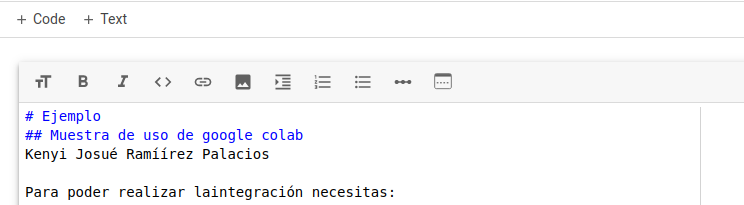


Vamos a añadir usa celda de código

In [4]:
#importamos librerías

import numpy as np
import pandas as pd
from sklearn import preprocessing


In [6]:
# Esta es una celda de código. Estáá basada en un proyecto previo. La utilidad read_htm de panda permite obtener todas las
#tablas en una página, siempre que estas no se encuentren en un iframe.

# Now we are interested in get the Cities Table from Wikipedia

url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Mexico'

#Read the html tables
table_MXN = pd.read_html(url)

#Select Cities table
city_data = table_MXN[1]

#Normalize Census information
aux = city_data[['2020 Census']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
aux_scaled = min_max_scaler.fit_transform(aux)

city_data['2020 Census'] = aux_scaled


In [7]:
city_data.head(12)

,Rank,City,Municipality,State,Geo. coordinates,2020 Census,2010 Census,Change
0,1,Mexico City,16 boroughs‡,Mexico City,".mw-parser-output .geo-default,.mw-parser-outp...",1.000000,8851080,+4.05%
1,2,Tijuana,Tijuana,Baja California,32°32′05″N 117°02′37″W﻿ / ﻿32.53472°N 117.04361°W,0.183569,1300983,+39.18%
2,3,Ecatepec,Ecatepec,State of Mexico,19°36′35″N 99°03′36″W﻿ / ﻿19.60972°N 99.06000°W,0.165140,1655015,−0.69%
3,4,León,León,Guanajuato,21°07′11″N 101°40′50″W﻿ / ﻿21.11972°N 101.68056°W,0.158098,1238962,+27.51%
4,5,Puebla,Puebla,Puebla,19°02′43″N 98°11′51″W﻿ / ﻿19.04528°N 98.19750°W,0.153952,1434062,+7.54%
5,6,Ciudad Juárez,Juárez,Chihuahua,31°44′22″N 106°29′13″W﻿ / ﻿31.73944°N 106.48694°W,0.149464,1321004,+13.67%
6,7,Guadalajara,Guadalajara,Jalisco,20°40′35″N 103°20′32″W﻿ / ﻿20.67639°N 103.34222°W,0.136672,1495182,−7.33%
7,8,Zapopan,Zapopan,Jalisco,20°43′14″N 103°23′18″W﻿ / ﻿20.72056°N 103.38833°W,0.122541,1142483,+10.07%
8,9,Monterrey,Monterrey,Nuevo León,25°40′17″N 100°18′31″W﻿ / ﻿25.67139°N 100.30861°W,0.109896,1135512,+0.66%
9,10,Ciudad Nezahualcóyotl,Nezahualcóyotl,State of Mexico,19°24′00″N 98°59′20″W﻿ / ﻿19.40000°N 98.98889°W,0.102142,1104585,−2.89%


Puedes correr cada celda usando el símbolo de play al lado de esta o en la  opción runtime seleccionando _run all_.

Para integrar a github puedes ir a la opción file:
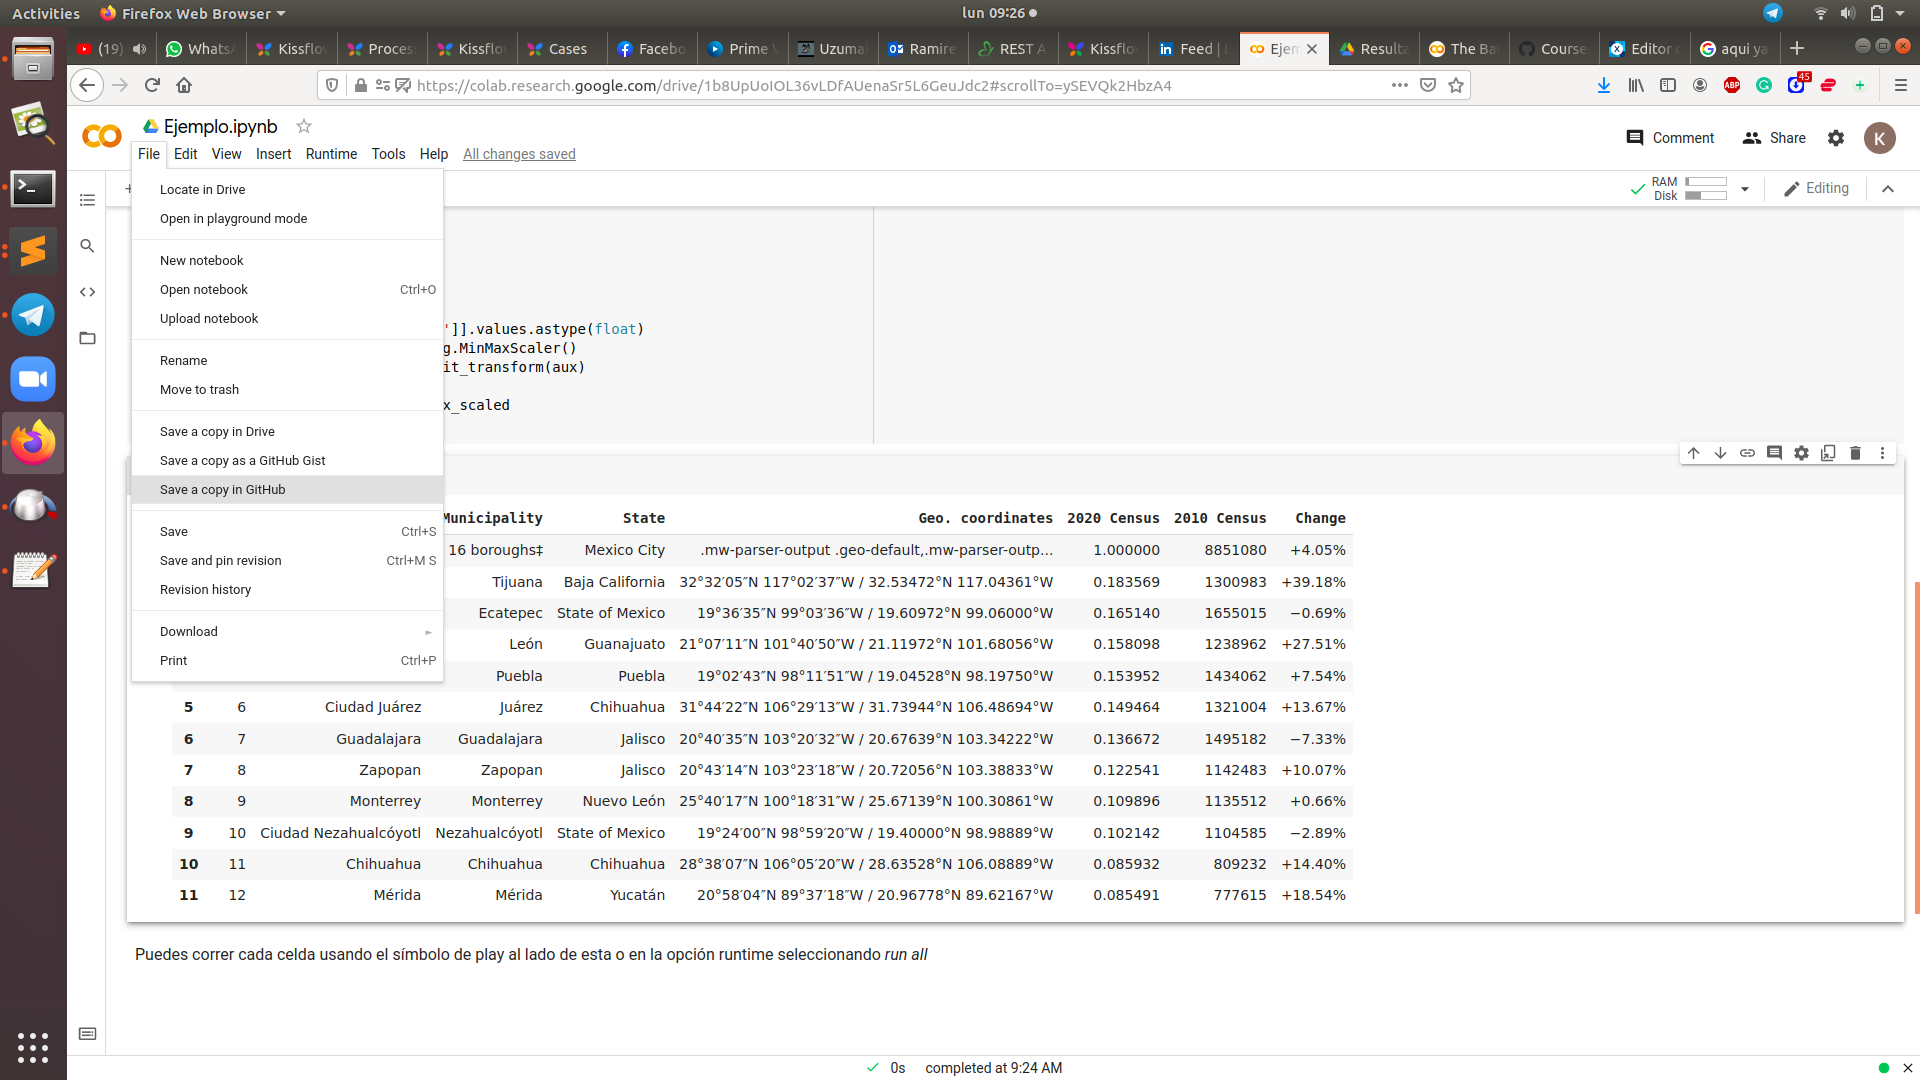

En caso de tener cuenta de github pero no haberla enlazado con google colab te va a pedir tu cuenta. Inserta la url de tu cuenta de github 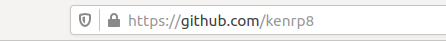